In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [2]:
input_path = '/Users/noahsuskin/desktop/Carbon_tax_project/Clean_Data/Clean_total_df.csv'
output_path = '/Users/noahsuskin/desktop/Carbon_tax_project/Pop_vs_Price_Regression/Pop_vs_Price_Regression_pic.png'

In [3]:
# Loading in df

df = pd.read_csv(input_path)
df

,Unnamed: 0,State,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Unemployment Count,CO2\n(Metric Tons),SO2\n(Metric Tons),NOx\n(Metric Tons),Allowances Sold,Auction Proceeds,Price
0,0,MN,68411.0,5527358.0,37.9,36245.0,547442.0,119218.0,119220500,95976,106992,NaN,NaN,NaN
1,1,NH,74057.0,1343622.0,42.7,38548.0,102352.0,30392.0,8762252,5392,10000,"3,151,333","13,878,414",4.403982
2,2,NJ,79363.0,8881845.0,39.8,40895.0,904132.0,285084.0,75646992,12280,40292,0,0,0.000000
3,3,NY,65323.0,19618453.0,38.7,37470.0,2797985.0,602636.0,111745556,42980,115744,"21,294,281","94,014,250",4.415000
4,4,RI,63296.0,1056611.0,39.9,34619.0,133055.0,34479.0,13391436,248,7540,"979,549","4,316,294",4.406409
5,5,VT,60076.0,624977.0,42.9,33238.0,67034.0,13878.0,39904,188,1948,"443,346","1,957,372",4.414999
6,6,WA,70116.0,7294336.0,37.6,36888.0,821621.0,198330.0,42643396,43376,56532,NaN,NaN,NaN
7,7,CA,71228.0,39148760.0,36.3,35021.0,5487141.0,1321502.0,174315472,5276,268588,NaN,NaN,NaN
8,8,CO,68811.0,5531141.0,36.6,36415.0,590504.0,139326.0,138851576,42592,77700,NaN,NaN,NaN
9,9,CT,76106.0,3581504.0,40.8,43056.0,348449.0,125909.0,38365936,3532,24176,"3,801,530","16,755,430",4.407549


In [4]:
# Dropping null values

df_clean = df
df_clean = df_clean.dropna()
df_clean = df_clean[df_clean['State'] != 'NJ']
df_clean = df_clean.reset_index()
df_clean = df_clean.drop(['Unnamed: 0', 'index'], axis=1)

df_clean

,State,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Unemployment Count,CO2\n(Metric Tons),SO2\n(Metric Tons),NOx\n(Metric Tons),Allowances Sold,Auction Proceeds,Price
0,NH,74057.0,1343622.0,42.7,38548.0,102352.0,30392.0,8762252,5392,10000,"3,151,333","13,878,414",4.403982
1,NY,65323.0,19618453.0,38.7,37470.0,2797985.0,602636.0,111745556,42980,115744,"21,294,281","94,014,250",4.415000
2,RI,63296.0,1056611.0,39.9,34619.0,133055.0,34479.0,13391436,248,7540,"979,549","4,316,294",4.406409
3,VT,60076.0,624977.0,42.9,33238.0,67034.0,13878.0,39904,188,1948,"443,346","1,957,372",4.414999
4,CT,76106.0,3581504.0,40.8,43056.0,348449.0,125909.0,38365936,3532,24176,"3,801,530","16,755,430",4.407549
5,DE,65627.0,949495.0,40.2,33989.0,109798.0,28501.0,12772692,2356,6292,"2,761,772","12,193,223",4.415000
6,ME,55425.0,1332813.0,44.6,31253.0,161743.0,32203.0,8806432,29220,23868,"2,054,315","9,031,936",4.396568
7,MD,81868.0,6003435.0,38.6,40517.0,553496.0,181089.0,71357280,73832,47184,"9,520,767","41,857,508",4.396443
8,MA,77378.0,6830193.0,39.4,41794.0,710305.0,203464.0,39903644,10044,33808,"9,520,767","41,857,508",4.396443


The r-squared value is 0.03


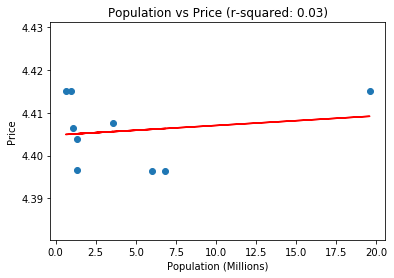

In [5]:
# Scatter Plot


x = (df_clean['Population']/1000000)
y = df_clean['Price']

slope, y_int, r, p, std_err = stats.linregress(df_clean['Population'], df_clean['Price'])
fit = slope * df_clean['Population'] + y_int

fig = plt.figure()
fig = plt.scatter(x, y)
fig = plt.plot(x, fit, color='r')

ax1 = plt.xlabel('Population (Millions)')
ax1 = plt.ylabel('Price')
ax1 = plt.title(f'Population vs Price (r-squared: {round(r**2,2)})')

print(f"The r-squared value is {round(r**2,2)}")
plt.savefig(output_path)
plt.show()